In [8]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [17]:
df=pd.read_csv("Social_Network_Ads.csv")

In [18]:
df.sample(4)

,Age,EstimatedSalary,Purchased
266,40,75000,0
58,22,18000,0
263,35,72000,0
33,28,44000,0


In [19]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

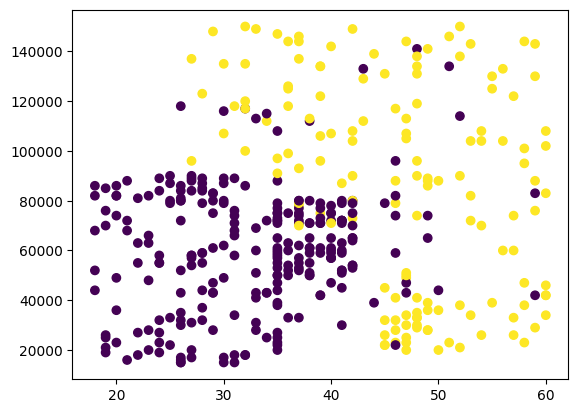

In [20]:
plt.scatter(df['Age'],df['EstimatedSalary'],c=df['Purchased'])

In [36]:
r=np.exp(df['Age']).sum(0)

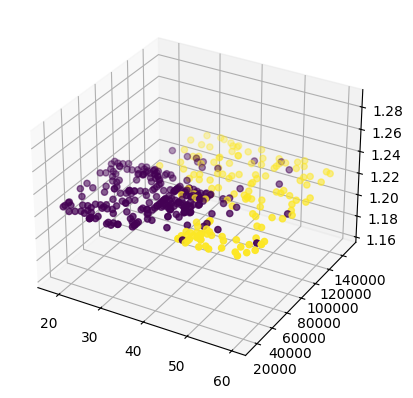

In [37]:
ax= plt.subplot(projection='3d')
ax.scatter(df['Age'],df['EstimatedSalary'],r,c=df['Purchased'])

In [45]:
X=df.iloc[:,:2]
y=df['Purchased'].values

In [46]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [39]:
import tensorflow

In [40]:
from tensorflow import keras 
from keras.models import Sequential 
from keras.layers import Dense ,Flatten 


In [56]:
model = Sequential()
model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

C:\Users\raj\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [57]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

In [58]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])

In [59]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.3615 - loss: 5457.7910 - val_accuracy: 0.3500 - val_loss: 2582.6292
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3177 - loss: 1897.6240 - val_accuracy: 0.6500 - val_loss: 171.4098
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5837 - loss: 104.1698 - val_accuracy: 0.6500 - val_loss: 80.9518
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4850 - loss: 139.6316 - val_accuracy: 0.6500 - val_loss: 163.1575
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5632 - loss: 121.8066 - val_accuracy: 0.6500 - val_loss: 32.1765
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5234 - loss: 107.5274 - val_accuracy: 0.3500 - val_loss: 180.8239
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4493 - loss: 130.9419 - val_accuracy: 0.6500 - val_loss: 60.5954
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5480 - loss: 104.0

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step


<Axes: >

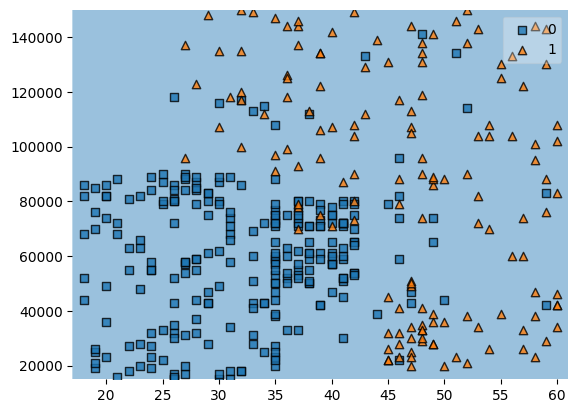

In [61]:
from mlxtend.plotting import plot_decision_regions 
plot_decision_regions(X.values,y,clf=model)

In [62]:
model1 = Sequential()
model1.add(Dense(10,activation="relu",input_dim=2))
model1.add(Dense(10,activation="relu"))
model1.add(Dense(1,activation='sigmoid'))

C:\Users\raj\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [66]:
model1.compile(loss='binary_crossentropy',metrics=['accuracy'])

In [68]:
history=model1.fit(X_train,y_train,epochs=50,batch_size=1,validation_data=(X_test,y_test)) 

Epoch 1/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4877 - loss: 12.5390 - val_accuracy: 0.6500 - val_loss: 6.4475
Epoch 2/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5328 - loss: 10.5151 - val_accuracy: 0.3500 - val_loss: 21.4229
Epoch 3/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5051 - loss: 11.1474 - val_accuracy: 0.6500 - val_loss: 6.7322
Epoch 4/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6017 - loss: 8.2940 - val_accuracy: 0.6500 - val_loss: 12.1121
Epoch 5/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5352 - loss: 8.6753 - val_accuracy: 0.3500 - val_loss: 24.8660
Epoch 6/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5013 - loss: 7.5180 - val_accuracy: 0.3500 - val_loss: 13.6128
Epoch 7/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4893 - loss: 7.2216 - val_accuracy: 0.3500 - val_loss: 9.8246
Epoch 8/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5387 - loss: 5.3428 - val_accur

In [69]:
model1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 304 (1.19 KB)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 153 (616.00 B)